import torch
from transformers import BertTokenizer, BertModel


# BERTの事前学習済みモデルをロード
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_attentions=True)

import seaborn as sns
import matplotlib.pyplot as plt

# テキストのトークン化
text = "I love natural language processing!"
tokens = tokenizer.encode_plus(text, return_tensors='pt', add_special_tokens=True, max_length=512, truncation=True)

# Attentionの取得
outputs = model(tokens['input_ids'], attention_mask=tokens['attention_mask'])
attention = torch.mean(outputs.attentions[-1], dim=1)[0].detach().numpy()

# ヒートマップの作成
sns.heatmap(attention, cmap="YlGnBu", xticklabels=tokenizer.convert_ids_to_tokens(tokens['input_ids'][0]), yticklabels=tokenizer.convert_ids_to_tokens(tokens['input_ids'][0]))
plt.show()

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib

In [40]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BertJapaneseTokenizer ,BertModel


model_name = "cl-tohoku/bert-base-japanese"
tokenizer = BertJapaneseTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_attentions=True,is_decoder=True)

input_text = "カレーうどんが美味しいです。けど明日はラーメンです。"
input_ids = tokenizer.encode(input_text,return_tensors='pt')

# Attentionを取得する
outputs = model(input_ids)

#CLS
#attention = outputs.attentions[-1][0].detach().numpy()
#attention = attention[-1::].squeeze(0)
#全部の平均か合計
attention = torch.sum(outputs.attentions[-1], dim=1)[0].detach().numpy()




print(input_text)
input_ids_np = tokenizer.encode(input_text)

print(input_ids_np)

print(tokenizer.convert_ids_to_tokens(input_ids_np))

print(tokenizer.tokenize(input_text))

print(attention.shape), len(tokenizer.convert_ids_to_tokens(input_ids_np))

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


カレーうどんが美味しいです。けど明日はラーメンです。
[2, 12396, 15788, 14, 18178, 485, 2992, 8, 11218, 11475, 9, 9714, 2992, 8, 3]
['[CLS]', 'カレー', 'うどん', 'が', '美味', '##しい', 'です', '。', 'けど', '明日', 'は', 'ラーメン', 'です', '。', '[SEP]']
['カレー', 'うどん', 'が', '美味', '##しい', 'です', '。', 'けど', '明日', 'は', 'ラーメン', 'です', '。']
(15, 15)
[12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


encoding = tokenizer(input_text)
mask = np.array(encoding["attention_mask"])
mask

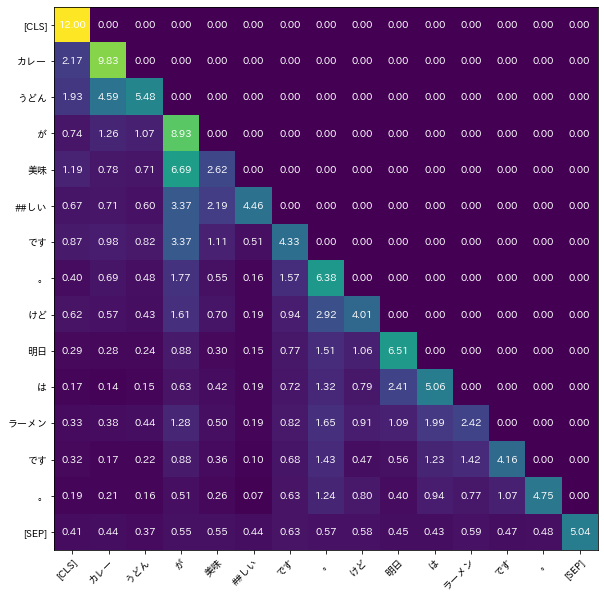

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(attention)

ax.set_xticks(range(len(tokenizer.convert_ids_to_tokens(input_ids_np))))
ax.set_yticks(range(len(tokenizer.convert_ids_to_tokens(input_ids_np))))
ax.set_xticklabels(tokenizer.convert_ids_to_tokens(input_ids_np))
ax.set_yticklabels(tokenizer.convert_ids_to_tokens(input_ids_np))

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(tokenizer.convert_ids_to_tokens(input_ids_np))):
    for j in range(len(tokenizer.convert_ids_to_tokens(input_ids_np))):
        text = ax.text(j, i, "{:.2f}".format(attention[i, j]),
                       ha="center", va="center", color="w")

plt.show()

In [42]:
attn = attention.mean(axis=0)
attn.shape

(15,)

In [45]:
attn = attention[:,0]

In [46]:
attn = attn[1:-1]
attn /= attn.max()
attn.shape
attn

array([1.        , 0.8884437 , 0.33888784, 0.54828686, 0.3073943 ,
       0.4012888 , 0.18500997, 0.2867834 , 0.13369346, 0.0771664 ,
       0.15322602, 0.14613828, 0.08661985], dtype=float32)

In [44]:
sentence = tokenizer.convert_ids_to_tokens(input_ids_np)[1:-1]

for word, attn in zip(sentence, attn):
    print(word,attn)


カレー 0.6904682
うどん 0.36660472
が 1.0
美味 0.3142767
##しい 0.21233037
です 0.3640775
。 0.5587751
けど 0.2829236
明日 0.37543672
は 0.3170443
ラーメン 0.17077522
です 0.18715449
。 0.17168364


In [47]:
sentence = tokenizer.convert_ids_to_tokens(input_ids_np)[1:-1]

for word, attn in zip(sentence, attn):
    print(word,attn)


カレー 1.0
うどん 0.8884437
が 0.33888784
美味 0.54828686
##しい 0.3073943
です 0.4012888
。 0.18500997
けど 0.2867834
明日 0.13369346
は 0.0771664
ラーメン 0.15322602
です 0.14613828
。 0.086619854


https://www.ai-shift.co.jp/techblog/2089